# To predict diabetes using PIMA diabetes data : Model Create

### Importing libraries

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [126]:
data = pd.read_csv("data/df_data.csv")
data.drop('Unnamed: 0',1,inplace=True)

In [127]:
data.shape

(607, 9)

In [128]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,53.94,33.6,0.627,50,1
1,1,85,66,29,53.94,26.6,0.351,31,0
2,8,183,64,0,53.94,23.3,0.672,32,1
3,1,89,66,23,94.00,28.1,0.167,21,0
4,5,116,74,0,53.94,25.6,0.201,30,0


In [129]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.model_selection import cross_val_score

regressors = {
    'Logistic Regression' : LogisticRegression(max_iter=1000),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Classifier' : SVC(),
    'K-nearest Neighbors' : KNeighborsClassifier(),
    'GaussianNB' : GaussianNB(),
    'XGBoost' : XGBClassifier()
}
results=pd.DataFrame(columns=['Accuracy '])
for method,func in regressors.items():
    func.fit(X_train,y_train)
    pred = func.predict(X_test)
    results.loc[method]= [
                          accuracy_score(y_test,pred),
                         ]
results

,Accuracy
Logistic Regression,0.808743
Decision Tree,0.726776
Random Forest,0.786885
Support Vector Classifier,0.792350
K-nearest Neighbors,0.770492
GaussianNB,0.765027
XGBoost,0.792350


In [82]:
Raw_models = [(LogisticRegression(max_iter=1000),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]),
             (RandomForestClassifier(),[{'n_estimators':[10,100,50,150,200]
                                         ,'max_depth':[5,7,8,10]
                                         ,'criterion':['gini','entropy']
                                         ,'random_state':[0]}])]

In [84]:
from sklearn.model_selection import GridSearchCV

for i,j in Raw_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train,y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{} Best Accuracy : {:.2f}% and Best Parameters : {}'.format(i,best_accuracy*100,best_param))
    print()

LogisticRegression(max_iter=1000) Best Accuracy : 78.52% and Best Parameters : {'C': 0.5, 'random_state': 0}

RandomForestClassifier() Best Accuracy : 78.77% and Best Parameters : {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100, 'random_state': 0}



small improved after parameter tunng 

In [91]:
rf = RandomForestClassifier(max_depth=5, criterion = 'entropy',n_estimators = 100, random_state = 0)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)
a = accuracy_score(y_test,pred)
print("accuracy_score with test",a)

[[119   8]
 [ 34  22]]
accuracy_score with test 0.7704918032786885


In [131]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)
a = accuracy_score(y_test,pred)
print(a)

[[115  12]
 [ 25  31]]
0.7978142076502732


In [132]:
rf = LogisticRegression(max_iter=1000)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)
a = accuracy_score(y_test,pred)
print(a)

[[115  12]
 [ 23  33]]
0.8087431693989071


In [88]:
train_scores = []
test_scores = []
n_est = [50,100,150,200,250,300,500]
for i in n_est:
    rfcl = RandomForestClassifier(max_depth=7, criterion = 'entropy',n_estimators = i, random_state = 0)
    rfcl.fit(X_train, y_train)

    train_scores.append(rfcl.score(X_train, y_train))
    test_scores.append(rfcl.score(X_test, y_test))

print(f"Max score of Train dataset at n_est = {train_scores.index(max(train_scores)) + 1} and score :- {max(train_scores)*100}%")
print(f"Max score of Test dataset at n_est = {test_scores.index(max(test_scores)) + 1} and score :- {round(max(test_scores)*100, 2)}%")

Max score of Train dataset at n_est = 4 and score :- 93.16037735849056%
Max score of Test dataset at n_est = 4 and score :- 80.87%


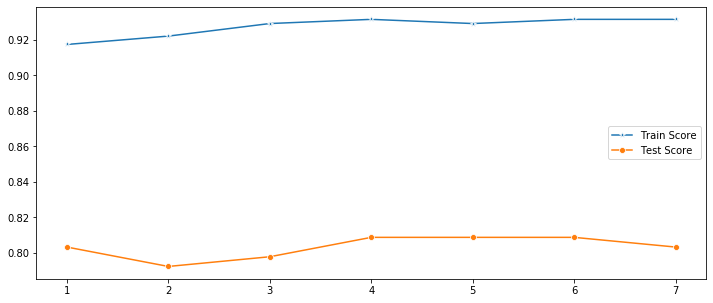

In [92]:
## training history graph 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,8),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,8),test_scores,marker='o',label='Test Score')

In [93]:
rf = RandomForestClassifier(max_depth=5, criterion = 'entropy',n_estimators = 200, random_state = 0)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)
a = accuracy_score(y_test,pred)
print("accuracy_score with test",a)

[[121   6]
 [ 32  24]]
accuracy_score with test 0.7923497267759563


### Best Model

In [133]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)
a = accuracy_score(y_test,pred)
print("accuracy_score with test",a)

[[117  10]
 [ 28  28]]
accuracy_score with test 0.7923497267759563


In [136]:
import pickle
# save the model to disk
filename = 'RandomForestClassifier.pkl'
pickle.dump(rf, open(filename, 'wb')) 

In [135]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)
a = accuracy_score(y_test,pred)
print("accuracy_score with test",a)

[[115  12]
 [ 23  33]]
accuracy_score with test 0.8087431693989071


In [137]:
import pickle
# save the model to disk
filename = 'LogisticRegression.pkl'
pickle.dump(lr, open(filename, 'wb')) 

After Preprocessing

In [96]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.pipeline import Pipeline
pipe = Pipeline([('min_max', MinMaxScaler()), ('standard', StandardScaler())])

x_finall = pipe.fit_transform(X)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_finall, y)

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rn = RandomForestClassifier(n_estimators=100, max_depth=7)
rn.fit(x_train, y_train)

print("accuracy_score For Train ",rn.score(x_train, y_train))

predict = rn.predict(x_test)
print("accuracy_score For Test ",accuracy_score(y_test, predict))

confusion_matrix(predict, y_test)

accuracy_score For Train  0.9406593406593406
accuracy_score For Test  0.756578947368421


array([[88, 31],
       [ 6, 27]], dtype=int64)

In [97]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('standard', StandardScaler()), ('min_max', MinMaxScaler())])
x1_finall = pipe.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(x1_finall, y)

rn = RandomForestClassifier(n_estimators=100, max_depth=7)
rn.fit(x_train, y_train)

print(rn.score(x_train, y_train))

predict = rn.predict(x_test)
print(accuracy_score(y_test, predict))

confusion_matrix(predict, y_test)

0.9494505494505494
0.7697368421052632


array([[100,  24],
       [ 11,  17]], dtype=int64)

In [ ]:
import pickle
# save the model to disk
filename = 'pipeMinSc_StdSc.pkl'
filename1 = 'RFClr.pkl'
pickle.dump(pipe, open(filename, 'wb')) 
pickle.dump(rn, open(filename1, 'wb')) 

## Predict individual Data and model save in pkl

In [139]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,53.94,33.6,0.627,50,1
1,1,85,66,29,53.94,26.6,0.351,31,0
2,8,183,64,0,53.94,23.3,0.672,32,1
3,1,89,66,23,94.00,28.1,0.167,21,0
4,5,116,74,0,53.94,25.6,0.201,30,0


In [149]:
import pickle
# save the model to disk
filename1 = 'RandomForestClassifier.pkl'
filename2 = 'LogisticRegression.pkl'
# load the model from disk
RFCL = pickle.load(open(filename, 'rb'))
LR= pickle.load(open(filename1, 'rb'))


In [161]:
# output = RFCL.predict([['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age']])
# print(output[0])
output = RFCL.predict([list(X.iloc[0,:].values)])
print(output[0])

1


In [163]:
# output = LR.predict([['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age']])
# print(output[0])
output = LR.predict([list(X.iloc[1,:].values)])
print(output[0])

0


In [170]:
# My Older Model
import pickle
# save the model to disk
filename = 'pipeMinSc_StdSc.pkl'
filename1 = 'RFClr.pkl'
# load the model from disk
model = pickle.load(open(filename1, 'rb'))
pipe= pickle.load(open(filename, 'rb'))

# a = [6,148,72,35,53.94,33.6,0.627,50]

# a = [1,89,66,23,94,28.1,0.167,21]
a = list(X.iloc[3,:].values)
x_test2 = pipe.transform([a])
output = model.predict(x_test2)
output[0]

0

## RandomForestClassifier, LogisticRegression Both Perform well

## In my older model Preprocessing MinMaxScaler, StandardScaler created pipeline and RandomForestClassifier model is also perform very well

## When Focus on missing(zero) values

In [98]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,53.94,33.6,0.627,50,1
1,1,85,66,29,53.94,26.6,0.351,31,0
2,8,183,64,0,53.94,23.3,0.672,32,1
3,1,89,66,23,94.00,28.1,0.167,21,0
4,5,116,74,0,53.94,25.6,0.201,30,0


## Check how many other missing(zero) values

In [100]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['Age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['SkinThickness'] == 0])))

total number of rows : 607
number of rows missing glucose_conc: 0
number of rows missing diastolic_bp: 0
number of rows missing insulin: 0
number of rows missing bmi: 0
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 171


In [103]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [104]:
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.model_selection import cross_val_score

regressors = {
    'Logistic Regression' : LogisticRegression(max_iter=1000),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Classifier' : SVC(),
    'K-nearest Neighbors' : KNeighborsClassifier(),
    'GaussianNB' : GaussianNB(),
    'XGBoost' : XGBClassifier()
}
results=pd.DataFrame(columns=['Accuracy '])
for method,func in regressors.items():
    func.fit(X_train,y_train)
    pred = func.predict(X_test)
    results.loc[method]= [
                          accuracy_score(y_test,pred),
                         ]
results

,Accuracy
Logistic Regression,0.770492
Decision Tree,0.704918
Random Forest,0.803279
Support Vector Classifier,0.797814
K-nearest Neighbors,0.754098
GaussianNB,0.754098
XGBoost,0.775956


In [124]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)
a = accuracy_score(y_test,pred)
print("accuracy_score with test",a)

[[114  13]
 [ 25  31]]
accuracy_score with test 0.7923497267759563


In [125]:
rf = RandomForestClassifier(max_depth=5, criterion = 'entropy',n_estimators = 200, random_state = 0)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)
a = accuracy_score(y_test,pred)
print("accuracy_score with test",a)

[[119   8]
 [ 32  24]]
accuracy_score with test 0.7814207650273224


In [122]:
## Apply Algorithm ensemble technique

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [123]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.792


In [108]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [109]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [110]:
classifier=xgboost.XGBClassifier()

In [111]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [112]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [113]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 41.37 seconds.


In [114]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=1,  monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y.ravel(),cv=10)

In [118]:
score

array([0.78688525, 0.78688525, 0.72131148, 0.6557377 , 0.7704918 ,
       0.81967213, 0.78688525, 0.8       , 0.75      , 0.76666667])

In [119]:
score.mean()

0.7644535519125684

In [120]:
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)
a = accuracy_score(y_test,pred)
print(a)

[[115  12]
 [ 24  32]]
0.8032786885245902


In [121]:
classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)